# Logistic Regression

Problem: Classify whether a person has 10 year coronary heart disease(TenYearCHD) based on certain attributes of the person.
Data format: CSV file.

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
df = pd.read_csv('project1_logreg.csv') 


In [3]:
# display the first 5 rows of the dataframe
df.head(10)

,male,age,education,currentSmoker,cigsPerDay,BPMeds,prevalentStroke,prevalentHyp,diabetes,totChol,sysBP,diaBP,BMI,heartRate,glucose,TenYearCHD
0,1,39,4.0,0,0.0,0.0,0,0,0,195.0,106.0,70.0,26.97,80.0,77.0,0
1,0,46,2.0,0,0.0,0.0,0,0,0,250.0,121.0,81.0,28.73,95.0,76.0,0
2,1,48,1.0,1,20.0,0.0,0,0,0,245.0,127.5,80.0,25.34,75.0,70.0,0
3,0,61,3.0,1,30.0,0.0,0,1,0,225.0,150.0,95.0,28.58,65.0,103.0,1
4,0,46,3.0,1,23.0,0.0,0,0,0,285.0,130.0,84.0,23.10,85.0,85.0,0
5,0,43,2.0,0,0.0,0.0,0,1,0,228.0,180.0,110.0,30.30,77.0,99.0,0
6,0,63,1.0,0,0.0,0.0,0,0,0,205.0,138.0,71.0,33.11,60.0,85.0,1
7,0,45,2.0,1,20.0,0.0,0,0,0,313.0,100.0,71.0,21.68,79.0,78.0,0
8,1,52,1.0,0,0.0,0.0,0,1,0,260.0,141.5,89.0,26.36,76.0,79.0,0
9,1,43,1.0,1,30.0,0.0,0,1,0,225.0,162.0,107.0,23.61,93.0,88.0,0


Observe if there is any missing data in the imported dataset

In [4]:

def missing_summary(df):
    # count the values in a column ignoring na i.e. not available values
    # count the number of missing values in a dataframe
    missing_summary = pd.DataFrame({'Total_non_missing':df.count(axis=0), 'missing_count': df.isna().sum(), 
                                    'missing_percentage': (df.isna().sum()/df.shape[0]*100) })
    print(missing_summary)

missing_summary(df)

                 Total_non_missing  missing_count  missing_percentage
male                          3811              0            0.000000
age                           3811              0            0.000000
education                     3715             96            2.519024
currentSmoker                 3811              0            0.000000
cigsPerDay                    3785             26            0.682236
BPMeds                        3763             48            1.259512
prevalentStroke               3811              0            0.000000
prevalentHyp                  3811              0            0.000000
diabetes                      3811              0            0.000000
totChol                       3765             46            1.207032
sysBP                         3811              0            0.000000
diaBP                         3811              0            0.000000
BMI                           3792             19            0.498557
heartRate           

From the output of the last cell, we can see that total number of rows or patient data is 3811 and out of that education, cigsPerDay, BPMeds, totChol, BMI, heartRate, glucose columns have missing values. Hence, we have to decide whether to remove these rows with missing values or replace them with some other suitable value.

In [5]:
# Check if the dataset is imbalanced or not
df['TenYearCHD'].sum() / df['TenYearCHD'].count()

0.15087903437418002

Let's first visualize the correlation between the features or columns.

In [6]:
df.corr()

,male,age,education,currentSmoker,cigsPerDay,BPMeds,prevalentStroke,prevalentHyp,diabetes,totChol,sysBP,diaBP,BMI,heartRate,glucose,TenYearCHD
male,1.000000,-0.035955,0.016031,0.194111,0.316957,-0.049542,0.004582,0.009341,0.017003,-0.074680,-0.035442,0.062985,0.095618,-0.120474,0.011820,0.084129
age,-0.035955,1.000000,-0.165067,-0.213213,-0.192247,0.110677,0.058171,0.299387,0.095987,0.253143,0.389532,0.200813,0.130109,-0.015174,0.121913,0.218817
education,0.016031,-0.165067,1.000000,0.013717,0.001560,-0.005717,-0.032586,-0.079163,-0.030564,-0.010388,-0.132398,-0.064224,-0.130706,-0.054072,-0.034818,-0.054787
currentSmoker,0.194111,-0.213213,0.013717,1.000000,0.767087,-0.052060,-0.034416,-0.095141,-0.040576,-0.047742,-0.123277,-0.101521,-0.160534,0.066863,-0.055146,0.021010
cigsPerDay,0.316957,-0.192247,0.001560,0.767087,1.000000,-0.042276,-0.030465,-0.055856,-0.032009,-0.027182,-0.080235,-0.048916,-0.078866,0.075164,-0.057391,0.060444
BPMeds,-0.049542,0.110677,-0.005717,-0.052060,-0.042276,1.000000,0.093413,0.259047,0.045559,0.067369,0.244599,0.187192,0.088942,0.005079,0.027748,0.082846
prevalentStroke,0.004582,0.058171,-0.032586,-0.034416,-0.030465,0.093413,1.000000,0.068892,0.010581,-0.001028,0.050079,0.035070,-0.007501,-0.019843,0.021416,0.064647
prevalentHyp,0.009341,0.299387,-0.079163,-0.095141,-0.055856,0.259047,0.068892,1.000000,0.061167,0.154709,0.694848,0.613725,0.291375,0.146511,0.069038,0.182569
diabetes,0.017003,0.095987,-0.030564,-0.040576,-0.032009,0.045559,0.010581,0.061167,1.000000,0.032183,0.096804,0.039565,0.072988,0.043050,0.583256,0.096095
totChol,-0.074680,0.253143,-0.010388,-0.047742,-0.027182,0.067369,-0.001028,0.154709,0.032183,1.000000,0.199153,0.157664,0.103881,0.096274,0.035780,0.076577


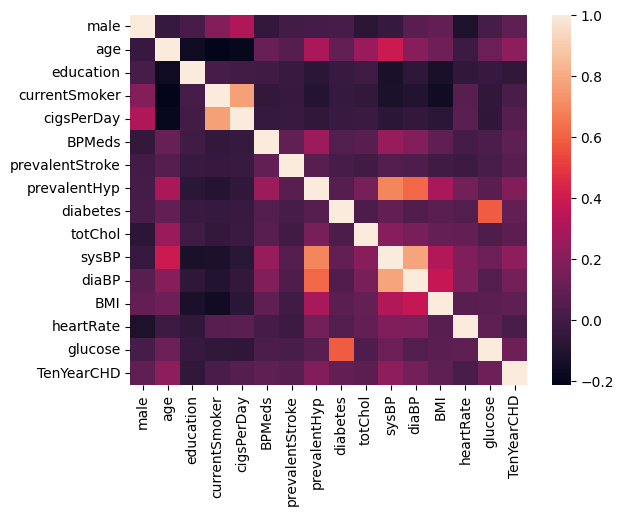

In [7]:
import seaborn as sns
ac = sns.heatmap(df.corr())

Observations from correlation matrix:
- It can be seen that education has least correlation with TenYearCHD.
- cigsPerDay is highly correlated with currentSmoker, 0.77. As cigsPerDay is only applicable for a smoker, currentSomker is redunant and can be removed.
- sysBP is highly correlated with diaBP, 0.78. Out of two sysBP has higher correlation with TenYearCHD. diaBP can be removed.
- education has negative correlation with TenYearCHD

In [8]:
#remove correlated features in logistic regression
df = df.drop(['currentSmoker','diaBP'], axis=1)

First defining a function that takes the name of the feature as string and generates the plots and provide descriptive statistics for that feature.

In [9]:
# a function to generate a basic plots of the feature    
def basic_plots(feature, feature2 = "age"):

    fig = plt.figure(figsize=(6,2))
    ax1 = fig.add_subplot(1,3,1)
    # kernel density plot: creates a probality density function in non-parametric way directly from the data
    df[feature].plot(kind = 'kde')
    ax2 = fig.add_subplot(1,3,2)
    # histogram plot: creates a histogram of the feature
    df[feature].plot(kind = 'hist')
    ax3 = fig.add_subplot(1,3,3,title ='plot wrt ' + feature2,  xlabel = feature2 , ylabel = feature)
    # scatter plot: creates a scatter plot of the feature with age
    ax3.scatter(df[feature2],df[feature])
    fig.tight_layout()
    plt.show()
    # Prilimanary statistics of the feature
    print(df[feature].describe())
    mode = df[feature].mode()[0]
    print('Mode        {}'.format(mode))



Let's visualise some basic plots of the features with missing values. Based on which we can decide how to deal with the missing values in a suitable way creating a balance between removing samples and modifying data.

In [10]:
# First of all, as only single row has missing heart rate, we can drop it
df = df[df['heartRate'].notnull()]

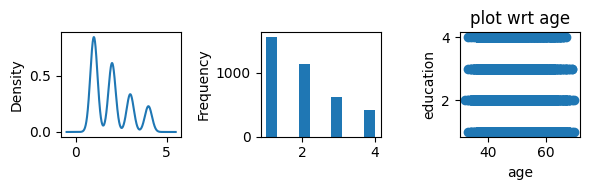

count    3714.000000
mean        1.975498
std         1.018119
min         1.000000
25%         1.000000
50%         2.000000
75%         3.000000
max         4.000000
Name: education, dtype: float64
Mode        1.0


In [11]:

basic_plots('education')


In [12]:
# Knowing that education has negative correlation with TenYearCHD and
# is possibly a feature that will acts as noise in this problem where other health realted features are more important
# removing the education feature from the dataset
df = df.drop('education', axis = 1)

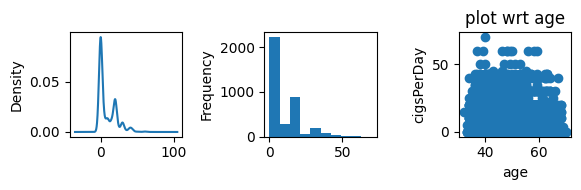

count    3784.000000
mean        8.983615
std        11.831746
min         0.000000
25%         0.000000
50%         0.000000
75%        20.000000
max        70.000000
Name: cigsPerDay, dtype: float64
Mode        0.0


In [13]:
basic_plots('cigsPerDay')

In [14]:
# the numbers of rows with missing values are less
# cigsPerDay is totally random and cannot be estimated
# hence removing the rows with missing cigsPerDay values
df = df[df['cigsPerDay'].notnull()]

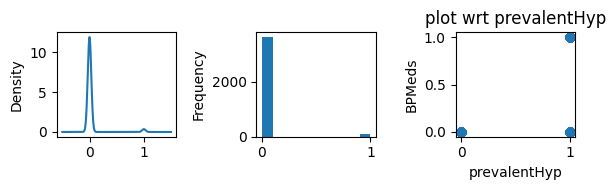

count    3736.000000
mean        0.029176
std         0.168321
min         0.000000
25%         0.000000
50%         0.000000
75%         0.000000
max         1.000000
Name: BPMeds, dtype: float64
Mode        0.0


In [15]:
# since BpMeds is correlated with prevalentHyp, we plot scatter of prevalentHyp vs BPMeds
basic_plots('BPMeds', feature2 = 'prevalentHyp')

In [16]:
# as it can be seen when prevalenthyp is 0 there are no BPMeds and also logically when there is no prevalent hyp, a person wont take any BPMeds
#  we can use this information to fill where prevalent hyp is 0
print(f"total rows with missing BPMeds: {df[df['BPMeds'].isna()].count()[0]}")
print(f"out of which with prevalentHyp=1: {df[df['BPMeds'].isna()]['prevalentHyp'].sum()}")

total rows with missing BPMeds: 48
out of which with prevalentHyp=1: 21


In [17]:
# now replacing the NaNs with 0 where prevalentHyp is 0
df.loc[(df.BPMeds.isna()) & (df.prevalentHyp == 0), 'BPMeds'] = 0



In [18]:
# count the number of missing values in a dataframe
df.isna().sum()

male                 0
age                  0
cigsPerDay           0
BPMeds              21
prevalentStroke      0
prevalentHyp         0
diabetes             0
totChol             46
sysBP                0
BMI                 19
heartRate            0
glucose            353
TenYearCHD           0
dtype: int64

In [19]:
# now removing the remaining empty BPMeds rows
df = df[df['BPMeds'].notnull()]

In [20]:
# removing rows with total cholesterol missing values
df = df[df['totChol'].notnull()]

In [21]:
# removing rows where BMI is null
df = df[df['BMI'].notnull()]

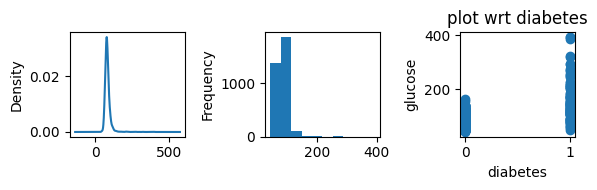

count    3387.000000
mean       81.554178
std        21.878381
min        40.000000
25%        71.000000
50%        78.000000
75%        87.000000
max       394.000000
Name: glucose, dtype: float64
Mode        75.0


In [22]:
basic_plots('glucose', feature2 = "diabetes")

It can be seen that glucose value ranges from 40 to 394 with most values near 100. Also, there is somewhat correlation between glucose and diabetes but only for higher glucose values. The missing glucose values cannot be assumed or replaced by some value because it will be biased towards available data.
As the number of rows with missing glucose values is large, they cannot be removed. One way is to remove the glucose feature from the dataset, as diabetes can act as information about the higher or lower glucose levels.

In [23]:
# removing glucose feature
df = df.drop(['glucose'], axis=1)

In [24]:
df.head()

,male,age,cigsPerDay,BPMeds,prevalentStroke,prevalentHyp,diabetes,totChol,sysBP,BMI,heartRate,TenYearCHD
0,1,39,0.0,0.0,0,0,0,195.0,106.0,26.97,80.0,0
1,0,46,0.0,0.0,0,0,0,250.0,121.0,28.73,95.0,0
2,1,48,20.0,0.0,0,0,0,245.0,127.5,25.34,75.0,0
3,0,61,30.0,0.0,0,1,0,225.0,150.0,28.58,65.0,1
4,0,46,23.0,0.0,0,0,0,285.0,130.0,23.10,85.0,0


In [25]:
# check if there are any missing values
df.isna().sum()

male               0
age                0
cigsPerDay         0
BPMeds             0
prevalentStroke    0
prevalentHyp       0
diabetes           0
totChol            0
sysBP              0
BMI                0
heartRate          0
TenYearCHD         0
dtype: int64

In [26]:
# Now we combine all the preprocessing steps into a single function.
def preprocess_data(data_dir):
    df = pd.read_csv(data_dir)

    df = df.drop(['currentSmoker','diaBP'], axis=1)
    # First of all, as only single row has missing heart rate, we can drop it
    df = df[df['heartRate'].notnull()]

    # Knowing that education has negative correlation with TenYearCHD and
    # is possibly a feature that will acts as noise in this problem where other health realted features are more important
    # removing the education feature from the dataset
    df = df.drop('education', axis = 1)
    # the numbers of rows with missing values are less

    # cigsPerDay is totally random and cannot be estimated
    # hence removing the rows with missing cigsPerDay values
    df = df[df['cigsPerDay'].notnull()]

    # now replacing the NaNs with 0 where prevalentHyp is 0
    df.loc[(df.BPMeds.isna()) & (df.prevalentHyp == 0), 'BPMeds'] = 0

    # now removing the remaining empty BPMeds rows
    df = df[df['BPMeds'].notnull()]

    # removing rows with total cholesterol missing values
    df = df[df['totChol'].notnull()]

    # removing rows where BMI is null
    df = df[df['BMI'].notnull()]

    # removing glucose feature
    df = df.drop(['glucose'], axis=1)

    # check if there are any missing values
    # print(df.isna().sum())
    missing_summary(df)
    return df

In [27]:
df = preprocess_data('project1_logreg.csv')

                 Total_non_missing  missing_count  missing_percentage
male                          3699              0                 0.0
age                           3699              0                 0.0
cigsPerDay                    3699              0                 0.0
BPMeds                        3699              0                 0.0
prevalentStroke               3699              0                 0.0
prevalentHyp                  3699              0                 0.0
diabetes                      3699              0                 0.0
totChol                       3699              0                 0.0
sysBP                         3699              0                 0.0
BMI                           3699              0                 0.0
heartRate                     3699              0                 0.0
TenYearCHD                    3699              0                 0.0


In [28]:
tenyearchd = df['TenYearCHD']
df_features = df.drop('TenYearCHD',axis=1)

In [29]:
from sklearn.model_selection import train_test_split
# As the data is not balanced, we use stratify splitting which keeps the ratio of selected feature same in train and test set.
X_train, X_test, y_train, y_test = train_test_split(df_features, tenyearchd, test_size=0.2, stratify=tenyearchd, random_state=21)

print(y_train.shape, X_train.shape)
print(y_test.shape, X_test.shape)

(2959,) (2959, 11)
(740,) (740, 11)


In [30]:
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import  MinMaxScaler, RobustScaler, StandardScaler, Normalizer
from sklearn.model_selection import GridSearchCV
from sklearn.linear_model import LogisticRegressionCV
# as the data is highly imbalanced, we need used class_weight='balanced'
# as we dont want to label a positive case as negative we use recall scoring even though a negative case might be predicted as positive
# Also logistic regression has a version with cross validation, we use it stratified cross validation 
pipe = Pipeline(steps =[('scaler', MinMaxScaler()), ('logistic_reg', LogisticRegressionCV(Cs=20, cv =5,
                         max_iter= 500, class_weight='balanced', scoring ='recall', random_state= 21)) ])


In [31]:
clf = pipe
clf.fit(X_train, y_train)

Pipeline(steps=[('scaler', MinMaxScaler()),
                ('logistic_reg',
                 LogisticRegressionCV(Cs=20, class_weight='balanced', cv=5,
                                      max_iter=500, random_state=21,
                                      scoring='recall'))])

In [32]:
clf.get_params()

{'memory': None,
 'steps': [('scaler', MinMaxScaler()),
  ('logistic_reg',
   LogisticRegressionCV(Cs=20, class_weight='balanced', cv=5, max_iter=500,
                        random_state=21, scoring='recall'))],
 'verbose': False,
 'scaler': MinMaxScaler(),
 'logistic_reg': LogisticRegressionCV(Cs=20, class_weight='balanced', cv=5, max_iter=500,
                      random_state=21, scoring='recall'),
 'scaler__clip': False,
 'scaler__copy': True,
 'scaler__feature_range': (0, 1),
 'logistic_reg__Cs': 20,
 'logistic_reg__class_weight': 'balanced',
 'logistic_reg__cv': 5,
 'logistic_reg__dual': False,
 'logistic_reg__fit_intercept': True,
 'logistic_reg__intercept_scaling': 1.0,
 'logistic_reg__l1_ratios': None,
 'logistic_reg__max_iter': 500,
 'logistic_reg__multi_class': 'auto',
 'logistic_reg__n_jobs': None,
 'logistic_reg__penalty': 'l2',
 'logistic_reg__random_state': 21,
 'logistic_reg__refit': True,
 'logistic_reg__scoring': 'recall',
 'logistic_reg__solver': 'lbfgs',
 'logisti

In [33]:
preds = clf.predict(X_test)

In [34]:
clf.predict_proba(X_test)

array([[0.45981568, 0.54018432],
       [0.23182992, 0.76817008],
       [0.2266092 , 0.7733908 ],
       ...,
       [0.39824716, 0.60175284],
       [0.44898074, 0.55101926],
       [0.10687152, 0.89312848]])

In [35]:
from sklearn.metrics import accuracy_score, fbeta_score, recall_score, precision_score, make_scorer

print(accuracy_score(y_test, preds))
print(fbeta_score(y_test, preds,beta= 1))
print(recall_score(y_test, preds))
print(precision_score(y_test, preds))

0.6527027027027027
0.3493670886075949
0.6330275229357798
0.24125874125874125


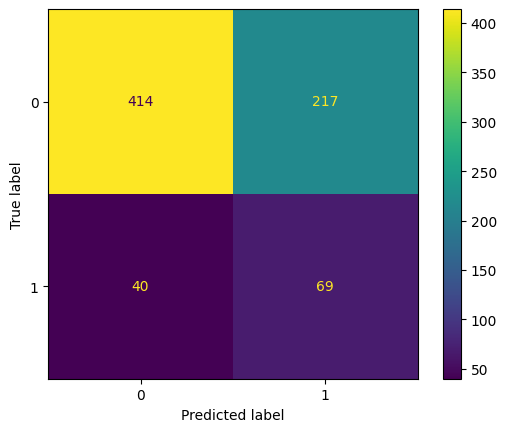

In [36]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
cm = confusion_matrix(y_test, preds, labels=clf.classes_)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=clf.classes_)
disp.plot()

It can be seen from the confusion matrix that false negatives are least and there are large number of false positives because **recall** scoring method was used.

# Imputation approach
In the above approach we removed the rows with missing values.
Now lets try to impute the missing values.

In [37]:
# Now we combine all the preprocessing steps into a single function.
def preprocess_data_v1(data_dir):
    df = pd.read_csv(data_dir)

    df = df.drop(['currentSmoker','diaBP'], axis=1)
  
    # Knowing that education has negative correlation with TenYearCHD and
    # is possibly a feature that will acts as noise in this problem where other health realted features are more important
    # removing the education feature from the dataset
    df = df.drop('education', axis = 1)
    # the numbers of rows with missing values are less

    # now replacing the NaNs with 0 where prevalentHyp is 0
    df.loc[(df.BPMeds.isna()) & (df.prevalentHyp == 0), 'BPMeds'] = 0

    # removing glucose feature
    df = df.drop(['glucose'], axis=1)

    # check if there are any missing values
    missing_summary(df)
    return df

In [38]:
df = preprocess_data_v1('project1_logreg.csv')

                 Total_non_missing  missing_count  missing_percentage
male                          3811              0            0.000000
age                           3811              0            0.000000
cigsPerDay                    3785             26            0.682236
BPMeds                        3790             21            0.551036
prevalentStroke               3811              0            0.000000
prevalentHyp                  3811              0            0.000000
diabetes                      3811              0            0.000000
totChol                       3765             46            1.207032
sysBP                         3811              0            0.000000
BMI                           3792             19            0.498557
heartRate                     3810              1            0.026240
TenYearCHD                    3811              0            0.000000


In [39]:
tenyearchd = df['TenYearCHD']
df_features = df.drop('TenYearCHD',axis=1)

In [40]:
from sklearn.model_selection import train_test_split
# As the data is not balanced, we use stratify splitting which keeps the ratio of selected feature same in train and test set.
X_train, X_test, y_train, y_test = train_test_split(df_features, tenyearchd, test_size=0.2, stratify=tenyearchd, random_state=21)

print(y_train.shape, X_train.shape)
print(y_test.shape, X_test.shape)

(3048,) (3048, 11)
(763,) (763, 11)


In [41]:
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import  MinMaxScaler, RobustScaler, StandardScaler, Normalizer
from sklearn.model_selection import GridSearchCV
from sklearn.linear_model import LogisticRegressionCV
from sklearn.impute import KNNImputer, SimpleImputer
# as the data is highly imbalanced, we need used class_weight='balanced'
# as we dont want to label a positive case as negative we use recall scoring even though a negative case might be predicted as positive
# Also logistic regression has a version with cross validation, we use it stratified cross validation 
clf = Pipeline(steps =[('imputer', KNNImputer(n_neighbors=5)), ('scaler', MinMaxScaler()), ('logistic_reg', LogisticRegressionCV(Cs=20, cv =5,
                         max_iter= 500, class_weight='balanced', scoring ='recall', random_state= 21)) ])


In [42]:
clf.fit(X_train, y_train)

Pipeline(steps=[('imputer', KNNImputer()), ('scaler', MinMaxScaler()),
                ('logistic_reg',
                 LogisticRegressionCV(Cs=20, class_weight='balanced', cv=5,
                                      max_iter=500, random_state=21,
                                      scoring='recall'))])

In [43]:
preds = clf.predict(X_test)

In [44]:
clf.predict_proba(X_test)

array([[0.84623559, 0.15376441],
       [0.66941786, 0.33058214],
       [0.66340674, 0.33659326],
       ...,
       [0.36087254, 0.63912746],
       [0.63059598, 0.36940402],
       [0.63360686, 0.36639314]])

In [45]:
from sklearn.metrics import accuracy_score, fbeta_score, recall_score, precision_score, make_scorer

print(accuracy_score(y_test, preds))
print(fbeta_score(y_test, preds,beta= 1))
print(recall_score(y_test, preds))
print(precision_score(y_test, preds))

0.6605504587155964
0.34760705289672544
0.6
0.24468085106382978


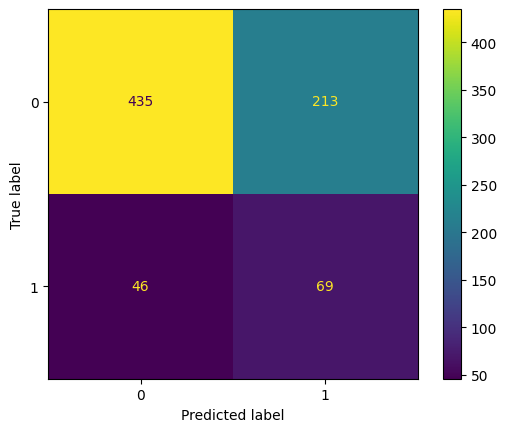

In [46]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
cm = confusion_matrix(y_test, preds, labels=clf.classes_)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=clf.classes_)
disp.plot()

In this method, we have not lost any sample data. However, there is a 3 % drop in recall score which is mainly because of unremoved samples.